### 필요 Package download

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 현재 gpu를 사용중이면 cuda로 출력됩니다!:
# gpu 변경은 런타임 -> 런타임 유형변경 -> 하드웨어 가속기: GPU로 할 수 있습니다.

print(device)

cuda


## 데이터 부연설명
* 저희가 사용할 dataset은 cifar-10이라는 이름을 가진, 컬러 이미지 데이터 60,000개가 들어있는
dataset입니다. <br>
* 해당 dataset은 총 10개의 class로 나누어져 있으며, 이 task는 각 이미지에 대한 class의 분류 accuracy를 높이는 것이 목적입니다.

### Data Normalize & DataLoader Settting

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:06<00:00, 26806573.90it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


horse  bird  ship truck


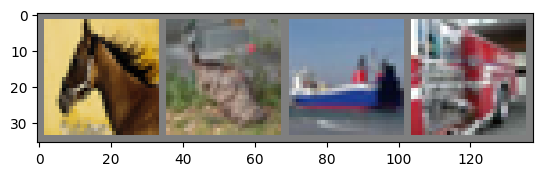

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수


def imshow(img):
    img = img / 2 + 0.5     # 표준화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.__next__()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
plt.show()

In [5]:
import torch.nn as nn
import torch.nn.functional as F

#해당 부분은 어느 정도 CNN의 개념이 포함되어 있습니다! 과제를 수행하는데 아무 관련도 없으니 그대로 두시면 됩니다!
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # input channels, output channels, kernel size
        self.pool = nn.MaxPool2d(2, 2)  # kernel size, stride, padding = 0 (default)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #아래 부분의 코드를 수정 혹은 추가해주시면 됩니다! (layer를 추가할때는 self.fc'num'=nn.Linear(x,y)의 형태로 추가하시면 됩니다!)
        self.fc1 = nn.Linear(400, 120) # input features, output features
        self.fc2 = nn.Linear(120, 48)
        self.fc3 = nn.Linear(48, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        #아래 부분에서 코드를 수정하거나 추가하여 forward 함수를 새롭게 지정해주시기 바랍니다!
        #Hint: relu 함수는 출력층을 제외한 모든 층에서 활성화 함수로써 작동되어야 합니다.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

#optimizer를 변경하거나 수치를 조정해보는 것도 accuracy를 높이는 데 도움을 줄 수 있습니다!
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum = 0.9)

In [7]:
for epoch in range(1):  # 데이터셋을 n차례 반복하여 학습합니다. 또한 range 속의 숫자도 바꾸어 학습률을 높이는 것도 도움이 될 겁니다!

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력을 받은 후
        inputs, labels = data
        # 변화도(Gradient) 매개변수를 0으로 만든 후
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력

        running_loss += loss.item()
        # 2000개의 data를 학습할때마다 loss 출력
        if i % 2000 == 1999:    # % 뒤에 들어갈 숫자의 크기를 조정하여 batch_size를 조정할 수 있습니다! 그리고 i % n == n-1:로 숫자를 맞춰주셔야 한다는 점 잊지 마세요!
            print('[%d, %5d] epoch loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000)) # running_loss 우측의 숫자 역시 윗줄에서 바꾼 batch_size로 바꿔주어야 합니다!
            running_loss = 0.0

print('Finished Training')

[1,  2000] epoch loss: 2.199
[1,  4000] epoch loss: 1.826
[1,  6000] epoch loss: 1.645
[1,  8000] epoch loss: 1.564
[1, 10000] epoch loss: 1.492
[1, 12000] epoch loss: 1.448
Finished Training


GroundTruth:    cat  ship  ship plane


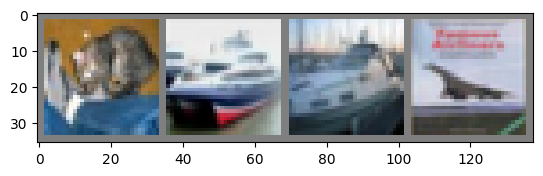

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.__next__()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
plt.show()

In [9]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car  ship


In [10]:
#과제2에서 요구하는 accuracy의 결과값이 나오는 code입니다! 캡처를 하실 때는 해당 코드의 결과를 캡처하시고, 이를 제출하여 주시기 바랍니다~
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 48 %


In [11]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 69 %
Accuracy of  bird : 24 %
Accuracy of   cat : 16 %
Accuracy of  deer : 38 %
Accuracy of   dog : 51 %
Accuracy of  frog : 77 %
Accuracy of horse : 54 %
Accuracy of  ship : 59 %
Accuracy of truck : 40 %


출처: https://m.blog.naver.com/ckdgus1433/221406102936의 튜토리얼을 참고하였습니다!

#과제

##1. 실습 파일의 overfitting model의 optimizer, epoch, learning rate 등을 변경하여 실행한 결과와, underfitting의 layer를 2개 이상 추가하여 실행한 결과를 각각 캡처하여 overfit, underfit이라는 이름으로 깃허브에 제출하기.

##2. 과제 파일을 수정하여 Test image에 대한 accuracy를 54% 이상으로 높이고, 모델의 결과에 대한 캡처본과 파일을 모두 깃허브에 제출하기. <br>
Hint: 파일 중간중간에 설명이 있는 부분을 참고하시면 아마 될 겁니다!<br>
(layer 추가, optimizer 변경, learning rate 조정 등...)

##3. MLP model과 기존 ML model의 차이점을 최소 2가지 측면에서 서술하기. <br>
답1:   <br>
답2:   

##4. Backpropagation이 무엇인지 자신의 언어로 한줄 요약!    <br>
답:
